<a href="https://colab.research.google.com/github/KimaniKibuthu/cats-vs-dogs/blob/main/Cats_Vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats Vs Dogs

## Introduction
See whether you can train a deep learning model to differntiate between a cat and a dog.

## Methodology

1. Data Collection
2. Data Preparation
3. Modelling

# Libraries

In [33]:
# General

import os
import shutil
import numpy as np
import tensorflow as tf
from PIL import Image
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Modelling
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Dropout
from tensorflow.keras.applications import InceptionV3, ResNet101

# Data Collection

In [2]:
# Kaggle details
os.environ["KAGGLE_USERNAME"] = 'kimanikibuthu'
os.environ["KAGGLE_KEY"] = 'f85c0bb5d43058fddcce7902e1325677'

In [3]:
# Get the data
!kaggle competitions download -c dogs-vs-cats

 98% 531M/543M [00:05<00:00, 82.1MB/s]
100% 543M/543M [00:05<00:00, 100MB/s] 
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 75.1MB/s]
 94% 256M/271M [00:03<00:00, 118MB/s]
100% 271M/271M [00:03<00:00, 73.3MB/s]


In [4]:
!unzip /content/train.zip
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

# Data Preparation

In [8]:
# save cats and dogs differently
sample_cats = []
sample_dogs = []
for root, dir, filename in os.walk('/content/train'):
  for value in filename:
    if value.startswith('cat'):
      sample_cats.append(value)
    else:
      sample_dogs.append(value)

 The length of the cat list is 12500


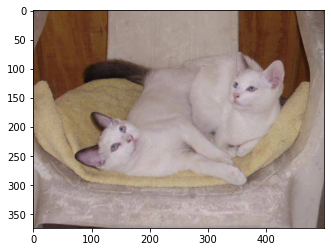

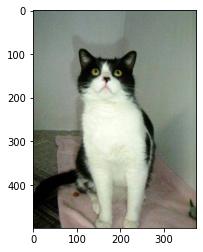

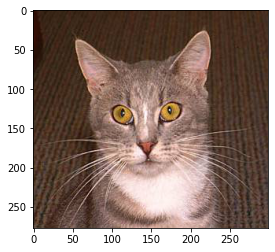

In [31]:
# Check length and print sample
print(f' The length of the cat list is {len(sample_cats)}')

# Get samples
cat_samples = random.sample(sample_cats, 3)

# View images
dir = '/content/train/'

for sample in cat_samples:
  img = mpimg.imread(os.path.join(dir, sample))
  imgplot = plt.imshow(img)
  plt.show()



 The length of the dog list is 12500


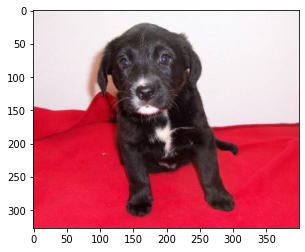

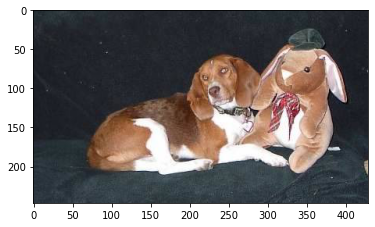

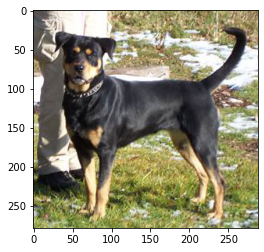

In [32]:
# View some dog
# Check length and print sample
print(f' The length of the dog list is {len(sample_dogs)}')

# Get samples
dog_samples = random.sample(sample_dogs, 3)

# View images
dir = '/content/train/'

for sample in dog_samples:
  img = mpimg.imread(os.path.join(dir, sample))
  imgplot = plt.imshow(img)
  plt.show()

The images contain dogs and cats of various sizes and orientations

In [35]:
# Move cats to a directory on themselves
cat_dir = os.mkdir(os.path.join(dir, 'cat'))
dog_dir = os.mkdir(os.path.join(dir, 'dog'))

# Move
for sample in sample_cats:
  shutil.move(os.path.join(dir, sample), cat_dir)

for sample in sample_dogs:
  shutil.move(os.path.join(dir, sample), dog_dir)

FileExistsError: ignored